Business Problem
Which geographical areas in Victoria have highest electricity demand and demand growth to define the marketing strategy? 

1. Using AEMO dataset, considering last 12 months electricity demand, show market share for each Distributor in Pie Charts,
-Commercial customer Electricity market share for distributors in 2019 
-Residential customer Electricity market share for distributors in 2019 

Show in the Map which areas had highest electricity demand in last year. Use different colours to mark different distributor.

2. Considering last 5 years data, calculate electricity demand growth percentage of each distributor for Commercial and Residential markets and show in a clustered column bar chart.


In [44]:
import pandas as pd
import glob

In [45]:
const_citipower = 'CitiPower'
const_jemena = 'Jemena'
const_powercor = 'Powercor'
const_ausnet = 'AusNet'
const_united = 'United'

In [46]:
# Load all demand data from 2014 to 2019
# demand_df = dd.read_csv('Meter data\VIC_20*.csv')
# demand_df.head()

dir = 'Meter data/VIC_20*.csv'
files = glob.glob(dir)
demand_df = pd.DataFrame()
for f in files:
    df = pd.read_csv(f)
    demand_df = demand_df.append(df,ignore_index=True)

demand_df.head()    

,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,VAL07,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
0,01/04/2014,CITIPOWER,6363749.701,83948.634,75686.720,70851.453,67607.385,66124.942,64953.942,64306.671,...,160069.821,152968.056,145198.285,133952.389,121154.389,113845.677,111219.265,111446.631,106211.512,MRIM
1,02/04/2014,CITIPOWER,5630825.535,93503.589,84693.357,79590.499,76384.550,74882.906,73439.136,72621.772,...,124538.811,119661.538,113667.967,105081.148,95684.746,91694.112,91698.657,93790.379,89377.501,MRIM
2,03/04/2014,CITIPOWER,5173891.385,77688.455,69851.785,65002.304,62203.224,60863.263,59985.433,59409.226,...,122934.586,118084.353,112122.808,104010.749,94635.246,90432.761,90406.507,92838.823,89320.024,MRIM
3,04/04/2014,CITIPOWER,5044050.180,77761.113,69530.046,64437.280,61304.327,59653.842,58588.591,58218.212,...,114460.060,110398.858,105854.672,100063.838,93741.476,91659.930,93286.271,96403.437,92482.282,MRIM
4,05/04/2014,CITIPOWER,4383318.300,80930.298,72390.242,66461.934,63121.603,60993.088,59567.853,58667.439,...,107937.349,104206.712,100866.709,96744.697,91474.783,91223.017,94194.091,98842.620,95486.413,MRIM


In [47]:

demand_df['SETTD'] =  pd.to_datetime(demand_df['SETTD'], format="%d/%m/%Y")
demand_df.head()


,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,VAL07,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
0,2014-04-01,CITIPOWER,6363749.701,83948.634,75686.720,70851.453,67607.385,66124.942,64953.942,64306.671,...,160069.821,152968.056,145198.285,133952.389,121154.389,113845.677,111219.265,111446.631,106211.512,MRIM
1,2014-04-02,CITIPOWER,5630825.535,93503.589,84693.357,79590.499,76384.550,74882.906,73439.136,72621.772,...,124538.811,119661.538,113667.967,105081.148,95684.746,91694.112,91698.657,93790.379,89377.501,MRIM
2,2014-04-03,CITIPOWER,5173891.385,77688.455,69851.785,65002.304,62203.224,60863.263,59985.433,59409.226,...,122934.586,118084.353,112122.808,104010.749,94635.246,90432.761,90406.507,92838.823,89320.024,MRIM
3,2014-04-04,CITIPOWER,5044050.180,77761.113,69530.046,64437.280,61304.327,59653.842,58588.591,58218.212,...,114460.060,110398.858,105854.672,100063.838,93741.476,91659.930,93286.271,96403.437,92482.282,MRIM
4,2014-04-05,CITIPOWER,4383318.300,80930.298,72390.242,66461.934,63121.603,60993.088,59567.853,58667.439,...,107937.349,104206.712,100866.709,96744.697,91474.783,91223.017,94194.091,98842.620,95486.413,MRIM


In [48]:
req_colms = ['DAILYT', 'VAL01', 'VAL02', 'VAL03', 'VAL04', 'VAL05', 'VAL06', 'VAL07', 'VAL08', 'VAL09', 'VAL10', 'VAL11', 
             'VAL12', 'VAL13', 'VAL14', 'VAL15', 'VAL16', 'VAL17', 'VAL18', 'VAL19', 'VAL20', 'VAL21', 'VAL22', 'VAL23', 
             'VAL24', 'VAL25', 'VAL26', 'VAL27', 'VAL28','VAL29', 'VAL30', 'VAL31', 'VAL32', 'VAL33', 'VAL34', 'VAL35', 
             'VAL36','VAL37', 'VAL38', 'VAL39', 'VAL40', 'VAL41', 'VAL42', 'VAL43', 'VAL44','VAL45', 'VAL46', 'VAL47', 'VAL48']

demand_df[req_colms] = demand_df[req_colms].astype('float64')


In [49]:
demand_df['Business_Demand'] = 0
demand_df['Non_Business_Demand'] = 0

for i, dailyDemand in demand_df.iterrows():
    d = dailyDemand['SETTD'].weekday()
    if((d == 5) or (d == 6)):
        demand_df.at[i,'Non_Business_Demand'] = dailyDemand['DAILYT']
        demand_df.at[i,'Business_Demand'] = 0
    else:
        demand_df.at[i,'Business_Demand'] = dailyDemand['VAL15'] + dailyDemand['VAL16'] + dailyDemand['VAL17'] + dailyDemand['VAL18'] + \
        dailyDemand['VAL19'] + dailyDemand['VAL20'] + dailyDemand['VAL21'] + dailyDemand['VAL22'] + dailyDemand['VAL23'] + dailyDemand['VAL24'] + \
        dailyDemand['VAL25'] + dailyDemand['VAL26'] + dailyDemand['VAL27'] + dailyDemand['VAL28'] + dailyDemand['VAL29'] + dailyDemand['VAL30'] + \
        dailyDemand['VAL31'] + dailyDemand['VAL32'] + dailyDemand['VAL33'] + dailyDemand['VAL34']
        
        demand_df.at[i,'Non_Business_Demand'] = dailyDemand['DAILYT'] - demand_df.at[i,'Business_Demand']

demand_df = demand_df[['SETTD','PROFILEAREA','DAILYT','Business_Demand', 'Non_Business_Demand']]
demand_df = demand_df.rename(columns={"SETTD": "Measure_Date", "PROFILEAREA": "Distributor", "DAILYT": "Daily_Demand"})
demand_df.head()

,Measure_Date,Distributor,Daily_Demand,Business_Demand,Non_Business_Demand
0,2014-04-01,CITIPOWER,6363749.701,3259495,3104254
1,2014-04-02,CITIPOWER,5630825.535,2824205,2806620
2,2014-04-03,CITIPOWER,5173891.385,2588082,2585809
3,2014-04-04,CITIPOWER,5044050.180,2520818,2523232
4,2014-04-05,CITIPOWER,4383318.300,0,4383318


In [50]:
def mapDistributorName(dist):
    db = ''
    if dist == 'CITIPOWER':
        db = const_citipower
    elif dist == 'VICAGL':        
        db = const_jemena
    elif dist == 'POWERCOR':        
        db = const_powercor
    elif dist == 'TXU':        
        db = const_ausnet
    elif dist == 'UNITED':        
        db = const_united       
    return db

In [51]:
demand_df["Distributor"] = demand_df['Distributor'].apply(mapDistributorName)
demand_df.to_csv('Meter data/Demand.csv', encoding='utf-8', index = False)

In [53]:
annualDemandDF = demand_df.loc[((demand_df.Measure_Date >= '2018-07-01') & (demand_df.Measure_Date < '2019-07-01'))]
demandDBGroupDF = annualDemandDF.groupby(['Distributor']).agg({'Daily_Demand':'sum'}) 
demandDBGroupDF = pd.DataFrame(demandDBGroupDF['Daily_Demand']/1000000)
demandDBGroupDF = demandDBGroupDF.rename(columns={"Daily_Demand" : "Total_Demand (GWh)"})
demandDBGroupDF

,Total_Demand (GWh)
Distributor,
AusNet,3835.008990
CitiPower,2047.161158
Jemena,1658.313100
Powercor,4512.949229
United,3370.957059


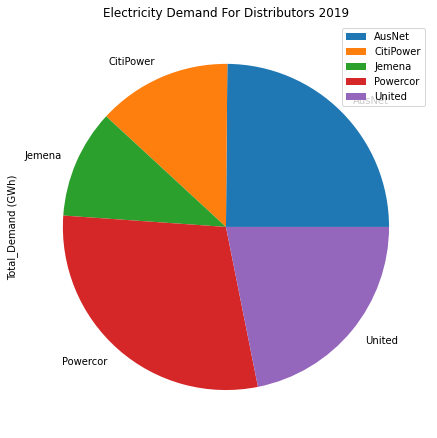

In [58]:

plot = demandDBGroupDF.plot(kind = "pie" ,y='Total_Demand (GWh)', figsize=(7.5, 7.5), title ="Electricity Demand For Distributors 2019" )